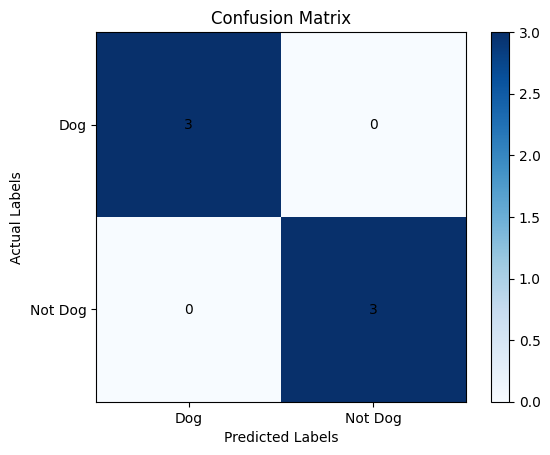

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Actual labels
actual_labels = np.array(['Dog', 'Not Dog', 'Dog', 'Not Dog', 'Dog', 'Not Dog'])

# Predicted labels
predicted_labels = np.array(['Dog', 'Not Dog', 'Dog', 'Not Dog', 'Dog', 'Not Dog'])

# Create confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels, labels=['Dog', 'Not Dog'])

# Display confusion matrix as a basic plot
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(np.arange(len(['Dog', 'Not Dog'])), ['Dog', 'Not Dog'])
plt.yticks(np.arange(len(['Dog', 'Not Dog'])), ['Dog', 'Not Dog'])

# Display values in the plot
for i in range(len(['Dog', 'Not Dog'])):
    for j in range(len(['Dog', 'Not Dog'])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
import cv2
import numpy as np

# Load an image
image = cv2.imread(r'C:\Users\HP\OneDrive\Pictures\WhatsApp Image 2023-10-16 at 8.26.58 AM.jpeg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply noise removal (you can use other filters as needed)
denoised = cv2.medianBlur(gray, 5)

# Apply thresholding
ret, thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Sure background area
sure_bg = cv2.dilate(thresh, None, iterations=3)

# Marker labelling
_, markers = cv2.connectedComponents(sure_bg)

# Apply watershed algorithm
markers = markers + 1
markers[thresh == 255] = 0
markers = cv2.watershed(image, markers)

# Draw contours on the original image
image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries

# Display the result
cv2.imshow('Segmented Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


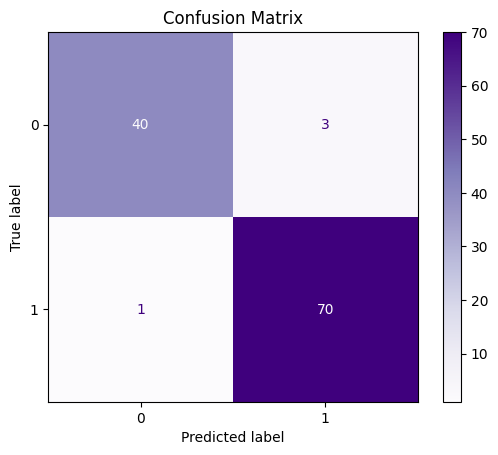

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title("Confusion Matrix")
plt.show()


ValueError: X has 30 features, but LogisticRegression is expecting 4 features as input.

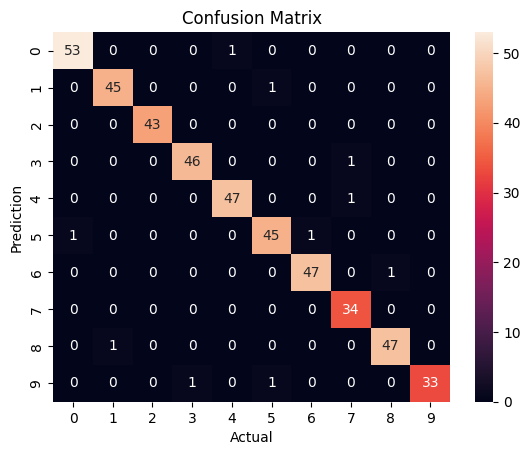

In [ ]:
#Import the necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
X,y=load_digits(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
# Train the model
clf=RandomForestClassifier(random_state=23)
clf.fit(X_train,y_train)

# preduction
y_pred=clf.predict(X_test)
# compute the confusion matrix
cm=confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Test Accuracy: 1.0


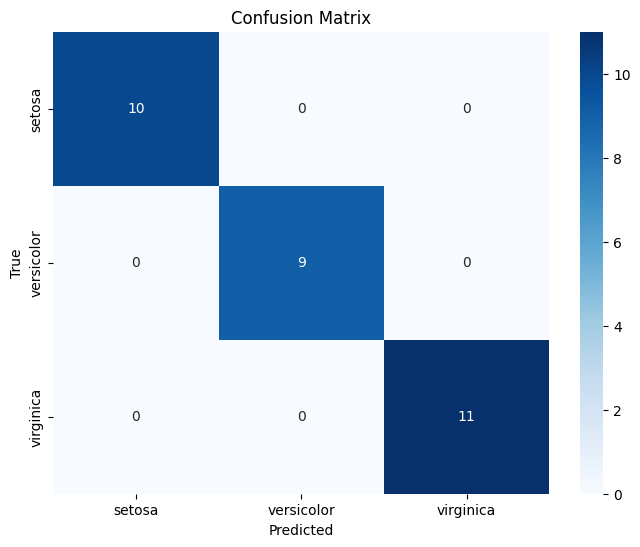

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the chosen database (Iris dataset in this example)
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (Decision Tree Classifier in this example)
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set to check for overfitting
y_pred = model.predict(X_test)
test_accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
)
)
plt.show()

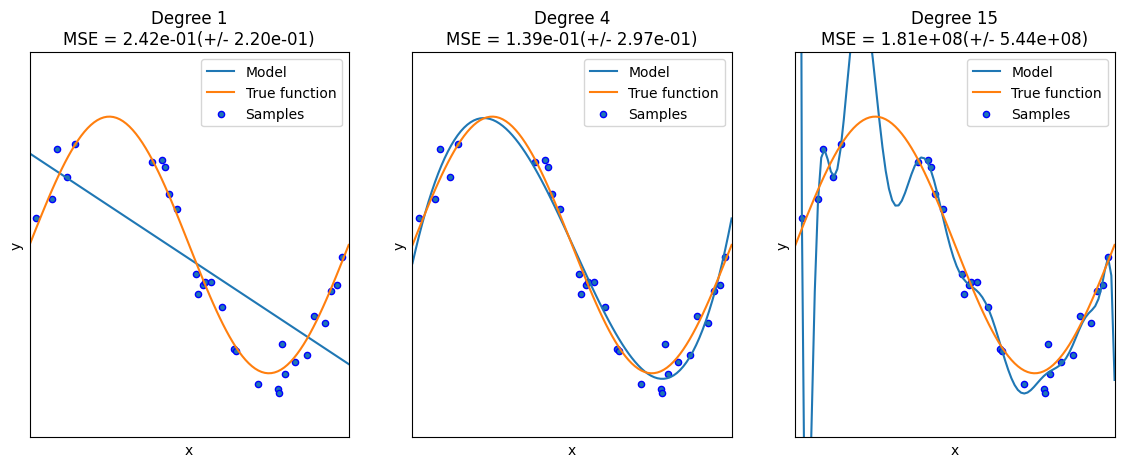

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.sin(2 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using cross-validation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()


Regression Coefficients: Slope = 2.684036231867389, Intercept = 4.234137615794255
Mean Squared Error: 0.9755437477937203


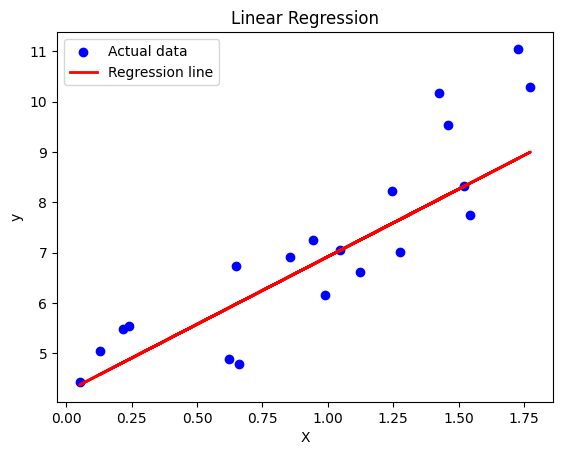

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the regression coefficients
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f'Regression Coefficients: Slope = {slope}, Intercept = {intercept}')

# Print mean squared error
print(f'Mean Squared Error: {mse}')

# Plot the data and regression line
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


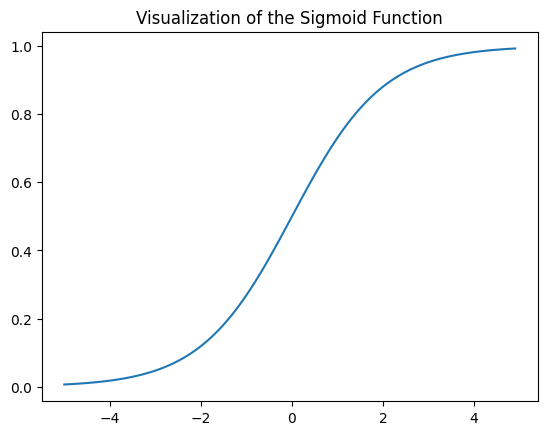

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
  return 1/(1+np.exp(-z))
plt.plot(np.arange(-5,5,0.1),sigmoid(np.arange(-5,5,0.1)))
plt.title('Visualization of the Sigmoid Function')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
texts = ["I love programming", "Machine learning is fascinating", "Python is a versatile language",
         "I dislike bugs in my code", "Data science is the future", "Programming is fun"]

labels = ["positive", "positive", "positive", "negative", "positive", "positive"]
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)
predictions = naive_bayes_classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")



Accuracy: 1.0


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)
predictions = logistic_regression_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")



Accuracy: 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test,predictions )
accuracy = accuracy_score(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

print(f"Accuracy: {accuracy}")



Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
predictions = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions )
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)




Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Estimated coefficients:
b_0 = 1.2363636363636363 
b_1 = 1.1696969696969697


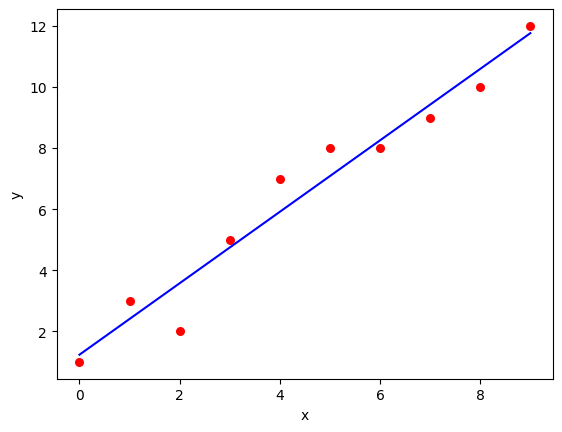

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    b = np.polyfit(x, y, 1)  # Use NumPy's polyfit for simplicity
    return b[1], b[0]

def plot_regression_line(x, y, b):
    plt.scatter(x, y, color="r", marker="o", s=30)
    y_pred = b[0] + b[1] * x
    plt.plot(x, y_pred, color="b")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def main():
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    b = estimate_coef(x, y)
    print(f"Estimated coefficients:\nb_0 = {b[0]} \nb_1 = {b[1]}")

    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()


In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

# Define the model
rf_model = RandomForestClassifier()

# Define hyperparameters and their possible values
param_dist = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV with accuracy as the scoring metric
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)


Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Define the model
rf_model = RandomForestClassifier()

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV with accuracy as the scoring metric
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
breast = datasets.load_breast_cancer()
X = breast.data
y = breast.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier()
param_dist = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
Accuracy on the test set: 0.956140350877193


In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
breast = datasets.load_breast_cancer()
X = breast.data
y = breast.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
predictions = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test,predictions )
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)




Accuracy: 0.956140350877193
Confusion Matrix:
[[40  3]
 [ 2 69]]
